### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [ ]:
!pip install mglearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [3]:
# Download the data (sonar.all-data) from the Sonar, Mines vs. Rocks Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df_sonar = pd.read_csv(url, header=None)
df_sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Substitute the categories M and R of the last column for integers
df_sonar.iloc[:,60] = LabelEncoder().fit_transform(df_sonar.iloc[:,60])
df_sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [5]:
# define features and target columns
X = df_sonar.iloc[:,:60].values
y = df_sonar.iloc[:,60].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=63)

In [6]:
df_sonar.groupby(60).size()

60
0    111
1     97
dtype: int64

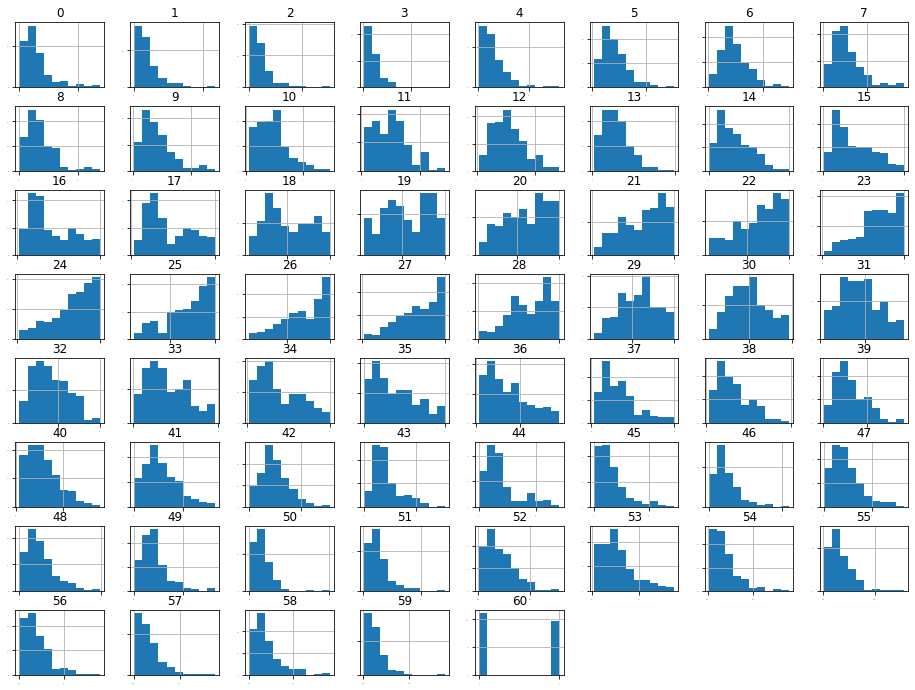

In [7]:
df_sonar.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,12))
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

k_folds = 10
seed = 63
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=k_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.732353 (0.132279)
KNN: 0.745588 (0.107058)
CART: 0.638235 (0.106722)
NB: 0.667647 (0.103755)
SVM: 0.720588 (0.114621)


In [9]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=k_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.703676 (0.062309)
ScaledKNN: 0.770956 (0.086722)
ScaledCART: 0.668382 (0.073065)
ScaledNB: 0.667647 (0.103755)
ScaledSVM: 0.806250 (0.081880)


# Since KNN scored better than others, let's optimize parameters for this model

In [10]:
# Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model (KNN).
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 20],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.95
Best parameters: {'C': 5, 'gamma': 1}
Best cross-validation score: 0.84

Best estimator:
SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


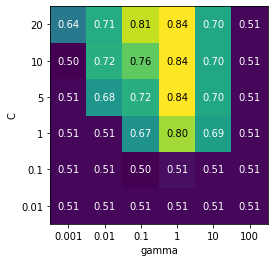

In [11]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [12]:
# confusion matrix
svc=SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
pred = svc.fit(X_train, y_train).predict(X_test)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Confusion matrix:
[[29  0]
 [ 2 11]]


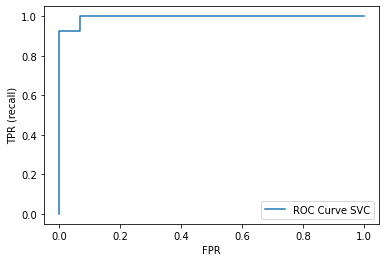

In [13]:
# plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)

The ROC curve produced here is quite impressive, i.e. the AUC area is really high, and the model is capable of predicting true positives quite accurately (straight line on y axis) and vice versa. In other words, the ROC curve produced by this model is almost an ideal one that a ML scientist would be aiming for. This curse gives indication that this is a quite good model for this problem and using this dataset. 

#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [14]:
!pip install xlrd
!pip install wget
import xlrd
import wget

In [15]:
# Download and load the data from the Cardiotocography Data Set
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls"
wget.download(url2)
df_ctg=pd.read_excel("CTG.xls", sheet_name='Raw Data')
df_ctg.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [16]:
df_ctg = df_ctg.dropna()
df_ctg.drop(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'DR', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'], axis =1, inplace=True)
df_ctg.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [17]:
df_ctg = df_ctg.reset_index()
df_ctg.drop(['index'], axis =1, inplace=True)
df_ctg.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [18]:
X = np.asarray(df_ctg[df_ctg.columns[:-2]]).astype(np.float32)
y_cls = np.asarray(df_ctg.CLASS).astype(np.int64)
y_nsp = np.asarray(df_ctg.NSP).astype(np.int64)

In [19]:
# Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the morphologic pattern and the other the fetal state.
# Let's first work with the morphologic pattern class
X_train, X_test, y_cls_train, y_cls_test = train_test_split(X, y_cls, test_size=0.2, shuffle= True, random_state = 63)
X_train, X_test, y_nsp_train, y_nsp_test = train_test_split(X, y_nsp, test_size=0.2, shuffle= True, random_state = 63)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [21]:
def search_better_model(feature, target):
    import time
    k_folds = 10
    scoring = 'accuracy'
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF', RandomForestClassifier()))
    pipelines = []
    pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
    pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
    pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
    pipelines.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()), ('GBC', GradientBoostingClassifier())])))
    pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
    results = []
    names = []
    for name, model in pipelines:
        start = time.time()
        kfold = KFold(n_splits=k_folds)
        cv_results = cross_val_score(model, feature, target, cv=kfold, scoring=scoring)
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        print('Time consumed {:.2f} seconds for this model'.format(end - start))

In [22]:
# predict the morphologic pattern scores
search_better_model(X_train, y_cls_train)

ScaledKNN: 0.731765 (0.028479)
Time consumed 0.34 seconds for this model
ScaledNB: 0.552941 (0.029994)
Time consumed 0.07 seconds for this model
ScaledSVM: 0.814118 (0.033914)
Time consumed 0.90 seconds for this model
ScaledGBC: 0.894118 (0.021209)
Time consumed 50.51 seconds for this model
ScaledRF: 0.890588 (0.026464)
Time consumed 3.58 seconds for this model


In [23]:
# predict the fetal state scores
search_better_model(X_train, y_nsp_train)

ScaledKNN: 0.913529 (0.013682)
Time consumed 0.29 seconds for this model
ScaledNB: 0.828235 (0.038013)
Time consumed 0.06 seconds for this model
ScaledSVM: 0.914118 (0.014928)
Time consumed 0.48 seconds for this model
ScaledGBC: 0.957059 (0.015123)
Time consumed 13.50 seconds for this model
ScaledRF: 0.940588 (0.017929)
Time consumed 3.45 seconds for this model


# From the above scores and their time-perfomance ratio, it is quite obvious that GradientBoostingClassifier and RandomForestClassifier are far better models for this problem and using these data, and they are also slower models compared to others tested here. However, RandomForestClassifier can predic the targets at comparable accuracy to the GradientBoostingClassifier, yet this model is pretty fast compared to the latter one.

# GradientBoostingClassifier and RandomForestClassifier performed better on these train data. Let's fit one of these for each prediction, i.e. GradientBoostingClassifier for predicting fetal state and RandomForestClassifier for predicting morphologic pattern scores

In [24]:
# At first, let's define a function for predicting model test score, confusion matrix, classification report etc.
import time
def machine_learn(model, feature_train, feature_test, target_train, target_test):
    start = time.time()
    model_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('model', model)])
    fitted_model = model_pipeline.fit(feature_train, target_train)
    print("Accuracy Score:", fitted_model.score(feature_test, target_test))
    end = time.time()
    print('Time consumed {:.2f} seconds for this model'.format(end - start))
    model_preds = fitted_model.predict(feature_test)
    print(classification_report(target_test, model_preds))
    cm=confusion_matrix(target_test, model_preds)
    print(cm)
    sns.heatmap(cm, annot=True)

Accuracy Score: 0.9460093896713615
Time consumed 1.31 seconds for this model
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       327
           2       0.89      0.79      0.84        68
           3       0.88      0.97      0.92        31

    accuracy                           0.95       426
   macro avg       0.91      0.91      0.91       426
weighted avg       0.95      0.95      0.95       426

[[319   6   2]
 [ 12  54   2]
 [  0   1  30]]


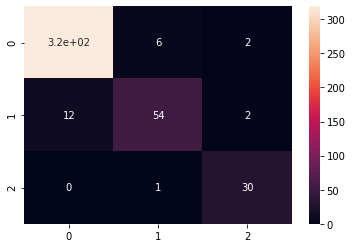

In [25]:
# Let's observe GradientBoostingClassifier test score using default parameters for predicting fetal state
machine_learn(GradientBoostingClassifier(), X_train, X_test, y_nsp_train, y_nsp_test)

In [26]:
# GridSearchCV using GradientBoostingClassifier for predicting fetal state
pipe_gbc = Pipeline([("scaler", StandardScaler()), ('GBC', GradientBoostingClassifier())])
param_grid_gbc = [{
    "GBC__n_estimators":[5,50,250,500],
    "GBC__max_depth":[1,3,5,7,9],
    "GBC__learning_rate":[0.01,0.1,1,10,100]
    }]
tuning_gbc = GridSearchCV(estimator=pipe_gbc, param_grid=param_grid_gbc, cv=5, n_jobs = -1)
tuning_gbc.fit(X_train, y_nsp_train)
print(tuning_gbc.best_params_)
print(tuning_gbc.best_score_)

{'GBC__learning_rate': 0.1, 'GBC__max_depth': 5, 'GBC__n_estimators': 500}
0.9564705882352941


Accuracy Score: 0.9507042253521126
Time consumed 8.64 seconds for this model
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       327
           2       0.90      0.82      0.86        68
           3       0.86      0.97      0.91        31

    accuracy                           0.95       426
   macro avg       0.91      0.92      0.91       426
weighted avg       0.95      0.95      0.95       426

[[319   5   3]
 [ 10  56   2]
 [  0   1  30]]


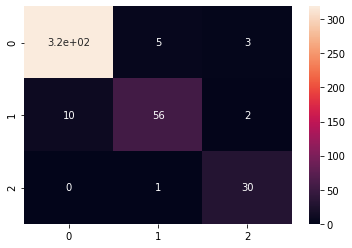

In [27]:
# Let's observe GradientBoostingClassifier test score using optimized parameters for predicting fetal state
machine_learn(GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=250), X_train, X_test, y_nsp_train, y_nsp_test)

# Now build GradientBoostingClassifier model for predicting morphologic pattern 

Accuracy Score: 0.8826291079812206
Time consumed 0.70 seconds for this model
              precision    recall  f1-score   support

           1       0.84      0.89      0.86        87
           2       0.95      0.92      0.93        99
           3       0.71      0.71      0.71        14
           4       1.00      0.78      0.88        18
           5       0.58      0.58      0.58        12
           6       0.92      0.92      0.92        64
           7       0.89      0.92      0.91        53
           8       0.93      1.00      0.97        14
           9       0.88      0.88      0.88        17
          10       0.85      0.83      0.84        48

    accuracy                           0.88       426
   macro avg       0.86      0.84      0.85       426
weighted avg       0.88      0.88      0.88       426

[[77  0  3  0  2  0  2  0  0  3]
 [ 1 91  1  0  2  3  0  0  1  0]
 [ 4  0 10  0  0  0  0  0  0  0]
 [ 0  4  0 14  0  0  0  0  0  0]
 [ 2  0  0  0  7  0  0  0  0  3]

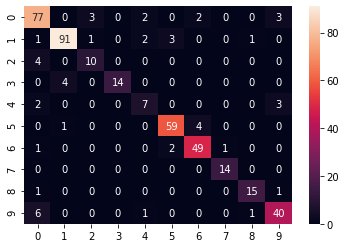

In [28]:
# First check the score using default parameters
machine_learn(RandomForestClassifier(), X_train, X_test, y_cls_train, y_cls_test)

In [29]:
# Let's optimize the GridSearchCV to get better parameters
pipe_rf = Pipeline([("scaler", StandardScaler()), ('RF', RandomForestClassifier())])
newer_grid = [{'RF__max_depth': [8, 12, 16], 
         'RF__min_samples_split': [12, 16, 20], 
         'RF__criterion': ['gini', 'entropy']}]
gridsearch = GridSearchCV(estimator=pipe_rf, 
                          param_grid=newer_grid, 
                          scoring='accuracy', 
                          cv=5)
gridsearch.fit(X_train, y_cls_train)
print(gridsearch.score(X_test, y_cls_test))
print(gridsearch.best_params_)

0.8755868544600939
{'RF__criterion': 'gini', 'RF__max_depth': 12, 'RF__min_samples_split': 12}


In [30]:
# Let's optimize the GridSearchCV one more round to get better parameters
pipe_rf = Pipeline([("scaler", StandardScaler()), ('RF', RandomForestClassifier())])
newer_grid = [{'RF__n_estimators': [50, 100, 150, 200, 500],
    'RF__max_features': ['auto', 'sqrt', 'log2'],
    'RF__max_depth' : [16, 20, 24], 'RF__min_samples_split': [2, 4, 8],
    'RF__criterion' :['gini', 'entropy']}]
gridsearch = GridSearchCV(estimator=pipe_rf, 
                          param_grid=newer_grid, 
                          scoring='accuracy', 
                          cv=5)
gridsearch.fit(X_train, y_cls_train)
print(gridsearch.score(X_test, y_cls_test))
print(gridsearch.best_params_)

0.892018779342723
{'RF__criterion': 'entropy', 'RF__max_depth': 16, 'RF__max_features': 'auto', 'RF__min_samples_split': 2, 'RF__n_estimators': 200}


Accuracy Score: 0.8896713615023474
Time consumed 0.50 seconds for this model
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        87
           2       0.96      0.93      0.94        99
           3       0.77      0.71      0.74        14
           4       1.00      0.83      0.91        18
           5       0.55      0.50      0.52        12
           6       0.94      0.92      0.93        64
           7       0.87      0.91      0.89        53
           8       0.93      1.00      0.97        14
           9       0.89      0.94      0.91        17
          10       0.86      0.88      0.87        48

    accuracy                           0.89       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.89      0.89      0.89       426

[[77  0  2  0  2  0  3  0  0  3]
 [ 1 92  1  0  2  2  0  0  1  0]
 [ 4  0 10  0  0  0  0  0  0  0]
 [ 0  3  0 15  0  0  0  0  0  0]
 [ 3  0  0  0  6  0  0  0  0  3]

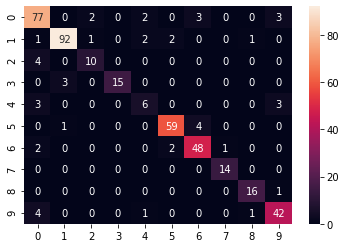

In [31]:
# Now run the model using optimized parameters
machine_learn(RandomForestClassifier(n_estimators=100, min_samples_split=4, max_features='sqrt', max_depth=20, criterion='entropy'), X_train, X_test, y_cls_train, y_cls_test)


# In conclusion, GradientBoostingClassifier and RandomForestClassifier are far better models for this problem and using these data. However, RandomForestClassifier is way faster than the GradientBoostingClassifier but their performances are camparable to each other.